In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#ML
from prophet import Prophet
sns.set(font_scale=1.5)

## Read in data

In [2]:
# Prepare the data. This script fixes the ABBREV.csv file and pulls the foods into their respective food groups
%run data_prep.py

In [7]:
averages_list = [cheeses_average, milks_average, soups_average, cereals_average, cookies_average, babyfoods_average, beans_average, rice_average, ice_creams_average, chips_average, pasta_average, fast_food_average, pizza_average, school_lunches_average, beef_average, bread_average, fish_average, candy_average, na_beverages_average, alcoholic_beverages_average, dressings_average, eggs_average, yogurts_average, oils_average, cake_average, butter_average, chicken_average, duck_average, goose_average, emu_average, ostrich_average, cow_average, pig_average, lamb_average, veal_average, game_average, gravy_average, pie_average, pudding_average, veggies_average, nuts_average, chocolate_average, snacks_average]

# combine all the dataframes into one using concat
all_averages = pd.concat(averages_list, ignore_index=True)

all_averages = all_averages.sort_values(by='Calories', ascending=False)
all_averages['Name'] = all_averages['Name'].str.replace('_Average', '')
all_averages['Name'] = all_averages['Name'].str.replace('_average', '')
all_averages

,id,Name,Calories,Protein_(g),Carbs_(g),Fiber_(g),Sugar_(g),Calcium_(mg),Sodium_(mg),Total_Fat_(g)
23,99999,oils,794.640000,1.900000,2.900000,0.160000,0.180000,9.100000,116.410000,58.2000
25,99999,butter,488.720000,6.410000,15.100000,2.080000,5.030000,66.420000,441.190000,31.2800
9,99999,chips,478.560000,7.210000,63.470000,5.020000,11.430000,77.410000,436.960000,13.2500
4,99999,cookies,468.500000,5.320000,67.030000,2.910000,31.260000,52.470000,342.510000,14.0800
17,99999,candy,466.520000,5.360000,67.060000,2.540000,52.890000,112.650000,135.400000,16.1500
42,99999,snacks,445.030000,7.720000,65.830000,4.320000,27.710000,198.530000,379.790000,10.6600
24,99999,cake,424.040000,4.920000,49.290000,1.720000,20.720000,80.380000,369.650000,17.5200
40,99999,nuts,417.500000,10.120000,29.390000,6.800000,9.560000,70.270000,118.570000,22.3400
41,99999,chocolates,375.606176,7.401176,53.867353,9.275882,30.767576,289.818235,176.181765,13.5212
3,99999,cereals,342.020000,8.260000,73.340000,7.650000,20.640000,159.420000,377.380000,2.2200


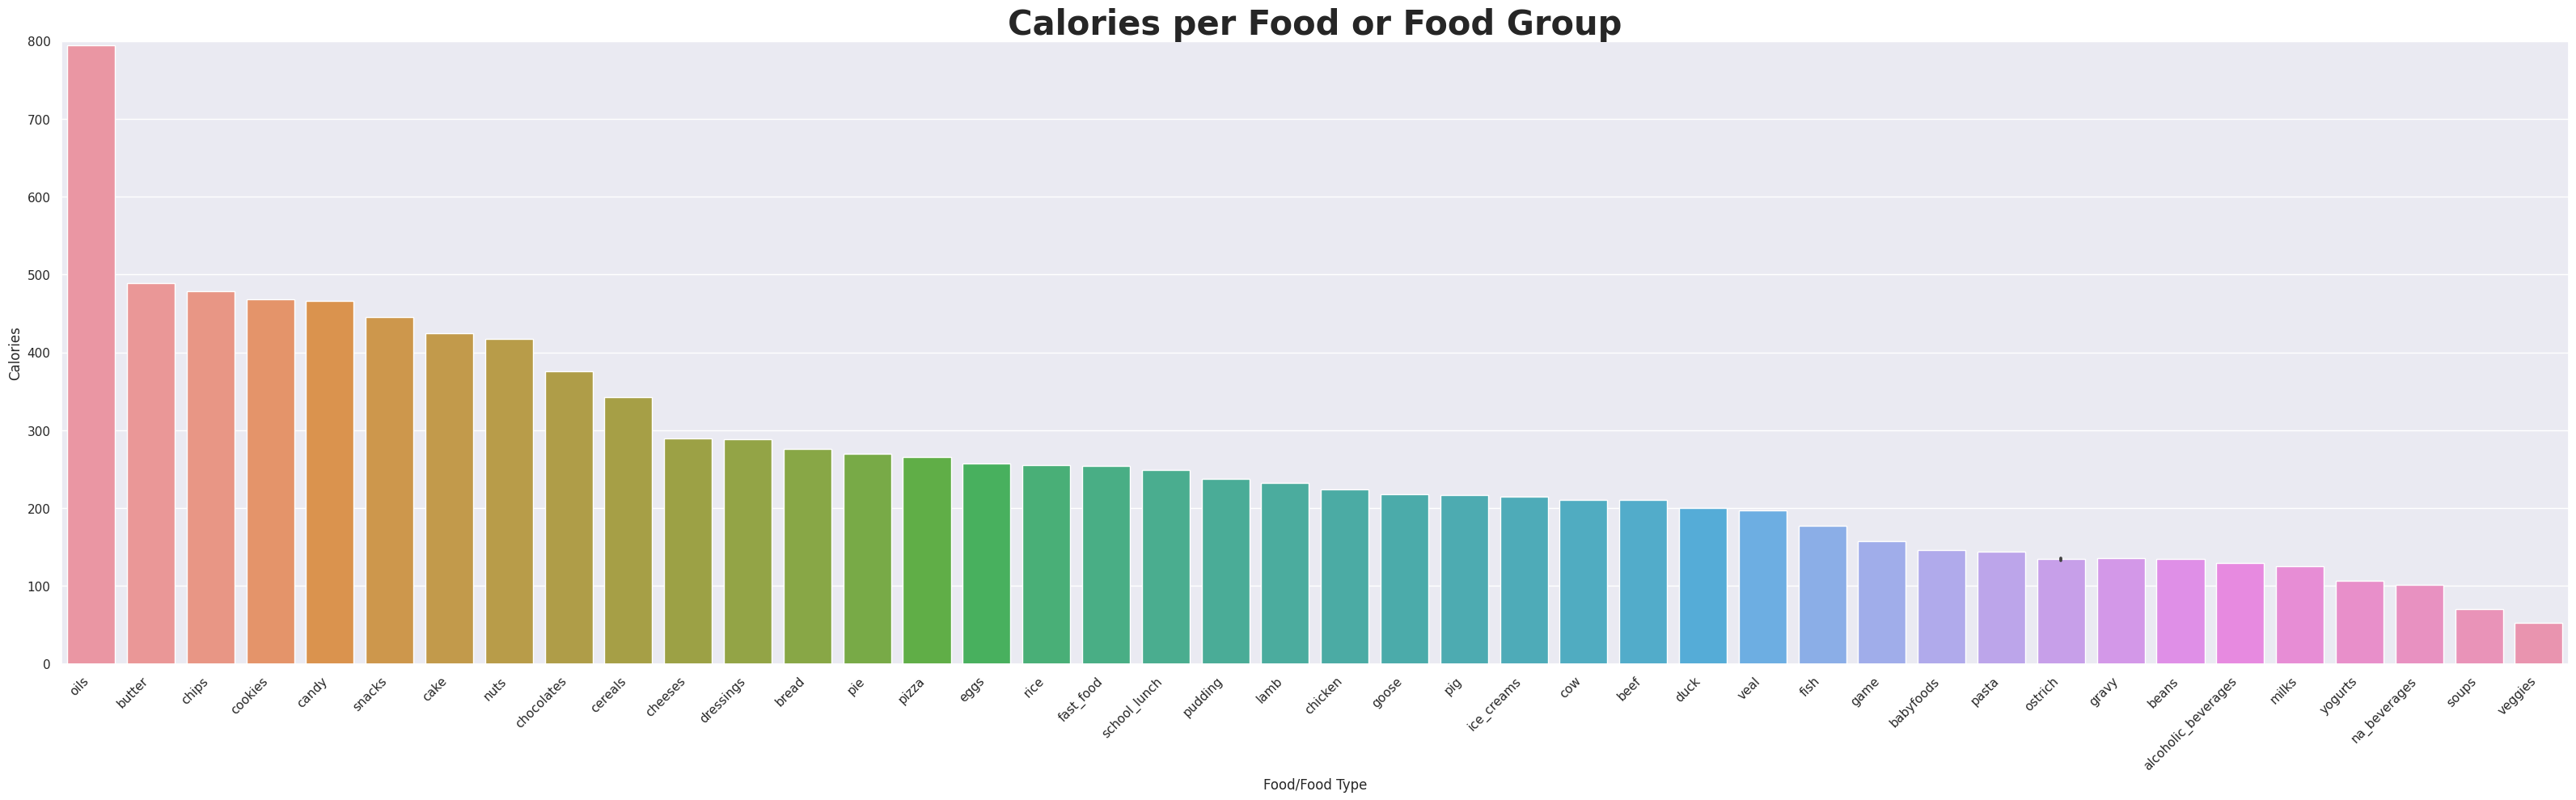

In [8]:
#Create bar graph of top ten Countries by coffee consumption
sns.set(rc={"figure.figsize":(40, 10)})
nutrition_barplot = sns.barplot(x=all_averages['Name'], y = all_averages['Calories'])
nutrition_barplot.set_ylabel('Calories (kcal)')
nutrition_barplot.set_xlabel('Food/Food Type')
nutrition_barplot.set_title('Calories per Food or Food Group', fontdict={'size': 30, 'weight': 'bold'})
nutrition_barplot.set_xticklabels(nutrition_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(0,800)
plt.show()

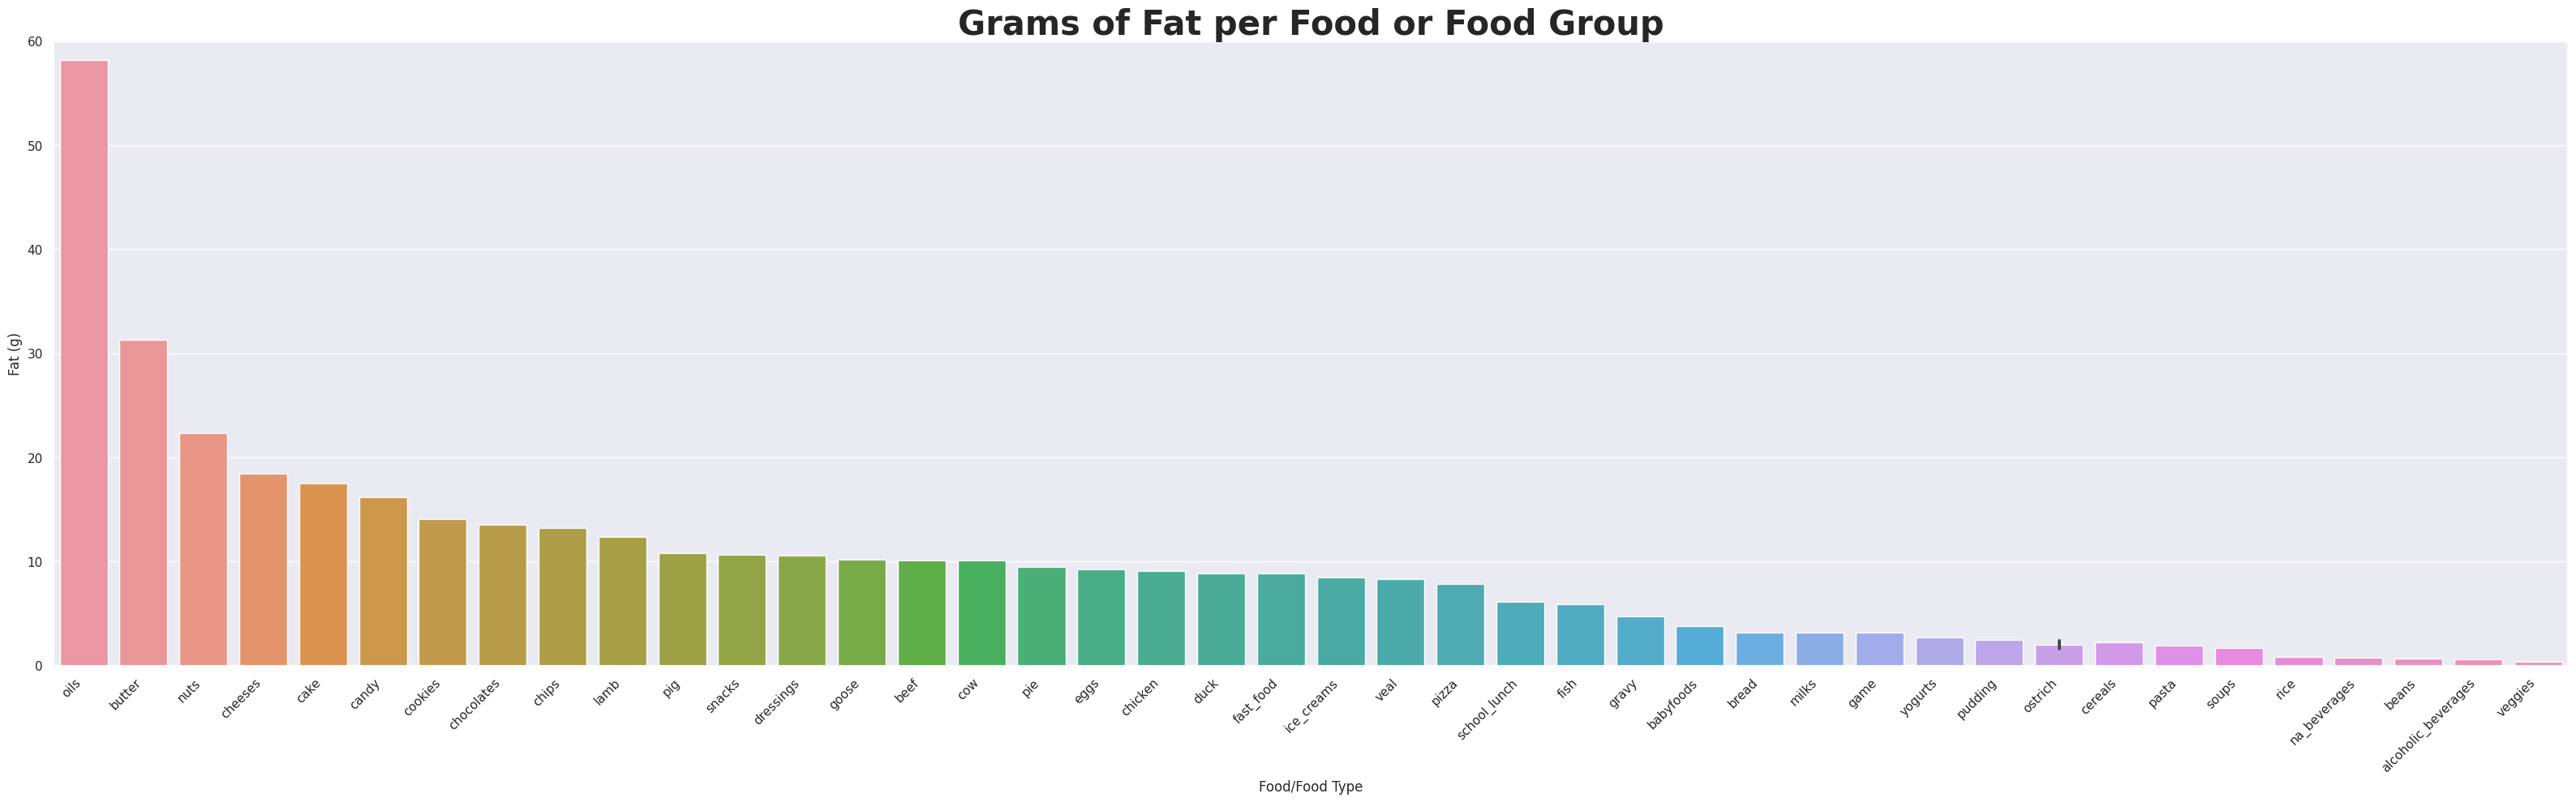

In [9]:
all_averages = all_averages.sort_values(by='Total_Fat_(g)', ascending=False)

sns.set(rc={"figure.figsize":(40, 10)})
nutrition_barplot = sns.barplot(x=all_averages['Name'], y = all_averages['Total_Fat_(g)'])
nutrition_barplot.set_ylabel('Fat (g)')
nutrition_barplot.set_xlabel('Food/Food Type')
nutrition_barplot.set_title('Grams of Fat per Food or Food Group', fontdict={'size': 30, 'weight': 'bold'})
nutrition_barplot.set_xticklabels(nutrition_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(0,60)
plt.show()

## Milks

In [ ]:
milk.loc['9999'] = milk.mean()
milk.loc['9999', ['Name']] = ['milk_Average']
milk.loc['9999', ['id']] = ['99999']
milk = milk.round(decimals=2)
milk_average = milk.tail(1)

In [4]:
#Create heatmap to check correlation in data
correlation = df[["Calories", 'Carbs_(g)', 'Protein_(g)', "Sugar_(g)", "Calcium_(mg)", "Total_Fat_(g)", "Sodium_(mg)"]].copy()
sns.set_theme(style="white")
corr = correlation.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')

,Calories,Carbs_(g),Protein_(g),Sugar_(g),Calcium_(mg),Total_Fat_(g),Sodium_(mg)
Calories,1.000000,0.493028,0.112636,0.351313,0.143632,0.754681,0.055515
Carbs_(g),0.493028,1.000000,-0.304295,0.678416,0.214085,-0.095558,0.073636
Protein_(g),0.112636,-0.304295,1.000000,-0.302557,0.038643,0.059670,-0.003324
Sugar_(g),0.351313,0.678416,-0.302557,1.000000,0.154179,-0.009460,-0.004457
Calcium_(mg),0.143632,0.214085,0.038643,0.154179,1.000000,0.013795,0.178618
Total_Fat_(g),0.754681,-0.095558,0.059670,-0.009460,0.013795,1.000000,0.001700
Sodium_(mg),0.055515,0.073636,-0.003324,-0.004457,0.178618,0.001700,1.000000


#### Notes: It appears that there isn't any strong correlations between any of the fields. The highest is between calories and fat, then sugar and carbs.

## Cheese

In [ ]:
sns.set_theme(style="white")
corr = cheese.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1)
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#Scatter plot comparing Calories with Saturated Fat in Cheese
sns.set(rc={"figure.figsize":(20, 5)})
scatter = sns.scatterplot(data=cheese, x='Calories', y='Total_Fat_(g)', legend='auto', s=50)
scatter.set_title("Correlation between Calories and Saturated Fat in Cheese", fontdict={'size': 20, 'weight': 'bold'})
scatter.set_xlabel('Calories', fontdict={'size': 15})
scatter.set_ylabel('Total Fat (g)', fontdict={'size': 15})
plt.ylim(-2, 35)
plt.xlim(0, 500)
plt.show()

### Notes: Strong correlation between fat and calorie content in cheese

## Milk

In [ ]:
sns.set_theme(style="white")
corr = milk.corr(method = 'pearson', min_periods = 1)
corr.style.background_gradient(cmap='coolwarm')

#### Notes: High correlation among many fields, especially sugar, protein, carbs, and calcium

### Are "lowfat milks" really low in fat?

In [ ]:
#milk = milk.sort_values(by='Saturated_Fat_(g)', ascending=False)
fat = ['NONFAT', 'FAT FREE', 'LOWFAT', 'LOW FAT', 'LO FAT']
pattern = '|'.join(fat)

lowfat_milk = milk[milk["Name"].str.contains(pattern)]
other_milk = milk[~milk["Name"].str.contains(pattern)]

In [ ]:
#Create row for "low fat" milk with averages for all columns
lowfat_milk.loc['9998'] = lowfat_milk.mean()
lowfat_milk.loc['9998', ['Name']] = ['Low_Fat_Milk_Average']
lowfat_milk.loc['9998', ['id']] = ['99998']
lowfat_milk = lowfat_milk.round(decimals=2)

#Create row for all other milk with averages for all columns
other_milk.loc['9999'] = other_milk.mean()
other_milk.loc['9999', ['Name']] = ['Other_Milk_Average']
other_milk.loc['9999', ['id']] = ['99999']
other_milk = other_milk.round(decimals=2)

#Combine the two and compare
compare_milk = pd.concat([lowfat_milk.loc['9998'], other_milk.loc['9999']], axis=1)
compare_milk.rename(columns={'9998': 'Low_Fat_Milk_Average', '9999': 'Other_Milk_Average'}, inplace=True)

#drop first two rows
compare_milk = compare_milk.iloc[2:]
compare_milk

### Notes: The Low Fat Milk option does have less fat than other milks, as well as more protein and calcium. However, the calorie count remains similar among both

## Fruits